In [2]:
# Purpose: load CSV dataset into a DataFrame with robust date parsing
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv("../data/raw_analyst_ratings.csv")  # put your raw CSV into data/ folder

# Check date column before conversion
print("Date column sample before conversion:")
print(df['date'].head(10))
print(f"\nDate column dtype: {df['date'].dtype}")
print(f"Null values in date: {df['date'].isnull().sum()}")

# Robust date conversion with error handling
def safe_date_convert(date_series):
    """Convert date series safely handling various formats and errors"""
    # First try direct conversion
    try:
        return pd.to_datetime(date_series, errors='coerce')
    except Exception as e:
        print(f"First conversion attempt failed: {e}")
        # If that fails, try with specific format hints
        try:
            return pd.to_datetime(date_series, errors='coerce', format='mixed')
        except Exception as e2:
            print(f"Mixed format also failed: {e2}")
            # Last resort: manual parsing
            return pd.to_datetime(date_series, errors='coerce', infer_datetime_format=True)

# Apply safe conversion
df['date'] = safe_date_convert(df['date'])

# Check for failed conversions
failed_conversions = df['date'].isnull().sum()
total_rows = len(df)
print(f"\nSuccessful conversions: {total_rows - failed_conversions}/{total_rows}")
print(f"Failed conversions: {failed_conversions}")

if failed_conversions > 0:
    print("\nSample of rows with failed date conversion:")
    print(df[df['date'].isnull()][['headline', 'date']].head())

df.head()

Date column sample before conversion:
0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
5    2020-05-22 11:23:25-04:00
6    2020-05-22 09:36:20-04:00
7    2020-05-22 09:07:04-04:00
8    2020-05-22 08:37:59-04:00
9    2020-05-22 08:06:17-04:00
Name: date, dtype: object

Date column dtype: object
Null values in date: 0

Successful conversions: 55987/1407328
Failed conversions: 1351341

Sample of rows with failed date conversion:
                                             headline date
10    30 Stocks Moving in Friday's Pre-Market Session  NaT
11  SVB Leerink Maintains Outperform on Agilent Te...  NaT
12  8 Stocks Moving In Thursday's After-Hours Session  NaT
13  Agilent Technologies shares are trading higher...  NaT
14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...  NaT


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Null values in headline: 0
Total rows: 1407328

Headline length statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_len, dtype: float64

Headlines with zero length: 0


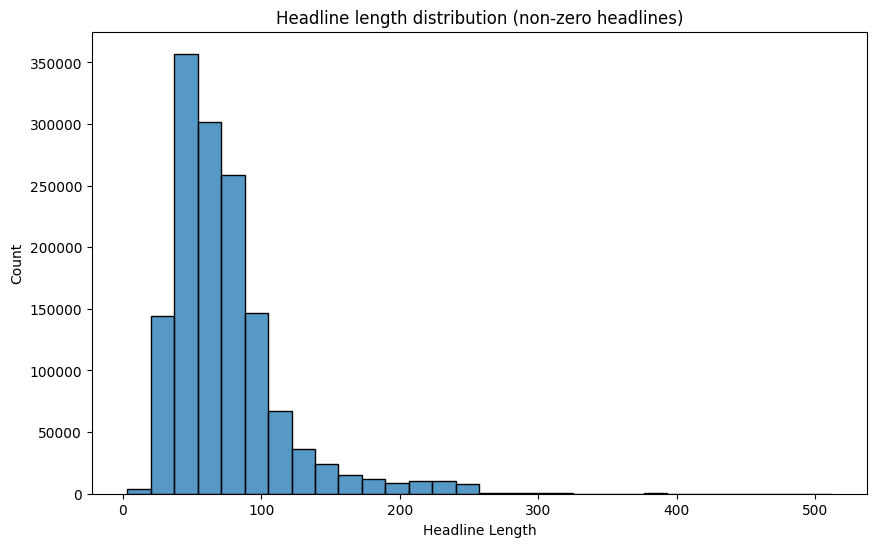

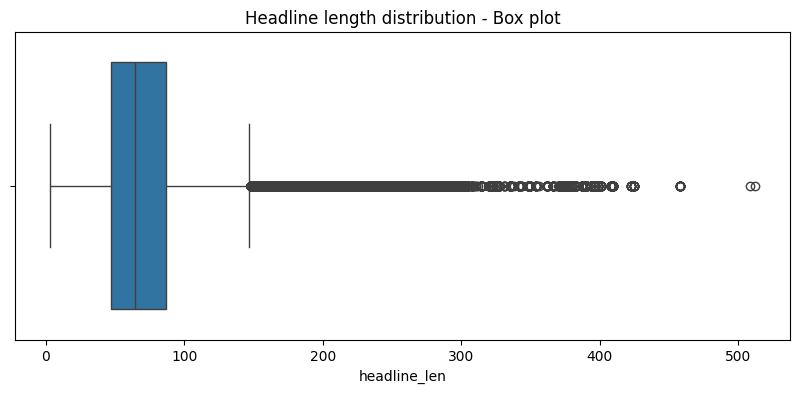

In [4]:
# Purpose: compute and inspect headline length statistics with error handling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handle potential NaN values in headline column
print(f"Null values in headline: {df['headline'].isnull().sum()}")
print(f"Total rows: {len(df)}")

# Fill NaN values with empty string for length calculation
df['headline_clean'] = df['headline'].fillna('').astype(str)

# Calculate headline length
df['headline_len'] = df['headline_clean'].str.len()

# Basic stats
print("\nHeadline length statistics:")
print(df['headline_len'].describe())

# Check for zero-length headlines
zero_len = (df['headline_len'] == 0).sum()
print(f"\nHeadlines with zero length: {zero_len}")

# Plot only if we have data
if len(df) > zero_len:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['headline_len'] > 0]['headline_len'], bins=30)
    plt.title("Headline length distribution (non-zero headlines)")
    plt.xlabel("Headline Length")
    plt.show()
    
    # Box plot to identify outliers
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[df['headline_len'] > 0]['headline_len'])
    plt.title("Headline length distribution - Box plot")
    plt.show()
else:
    print("No valid headlines to plot")

Null values in publisher: 0
Top 20 publishers:
publisher_clean
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


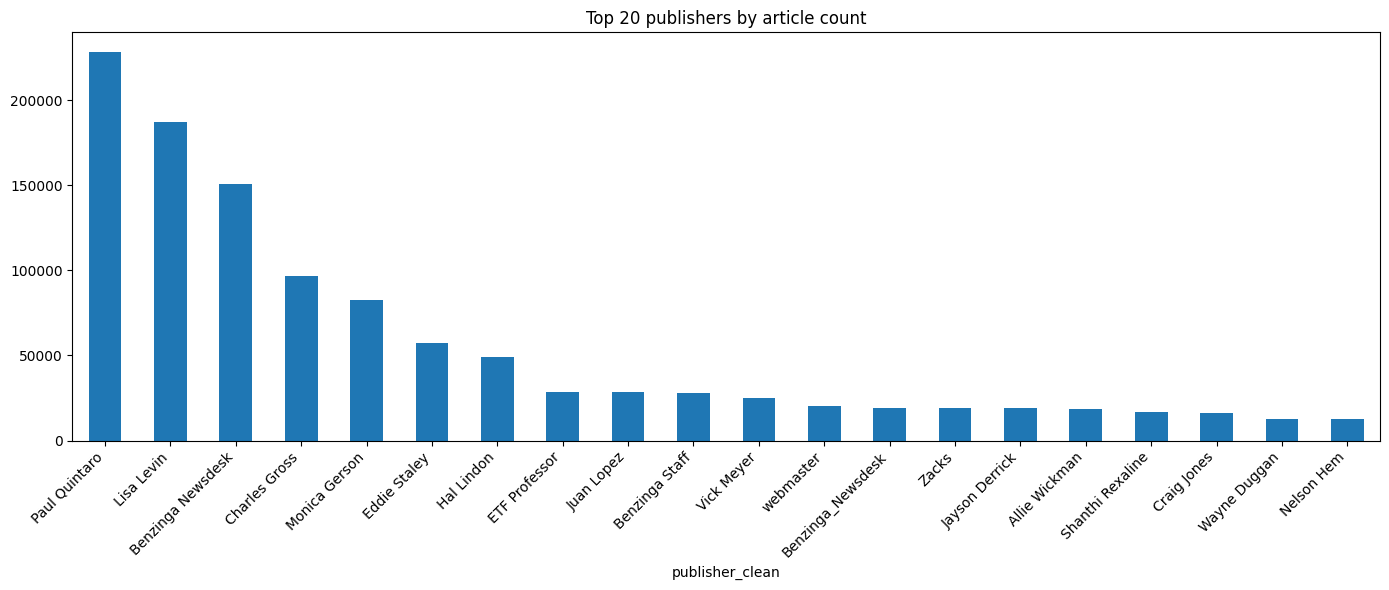


Top 10 publishers account for 66.5% of all articles


In [5]:
# Purpose: find most active publishers with robust handling
print(f"Null values in publisher: {df['publisher'].isnull().sum()}")

# Fill NaN and handle empty strings
df['publisher_clean'] = df['publisher'].fillna('Unknown')

# Count publishers
publisher_counts = df['publisher_clean'].value_counts()

print("Top 20 publishers:")
print(publisher_counts.head(20))

# Plot
plt.figure(figsize=(14, 6))
if len(publisher_counts) > 0:
    # Only plot if we have publishers
    top_publishers = publisher_counts.head(20)
    if len(top_publishers) > 0:
        top_publishers.plot(kind='bar')
        plt.title(f"Top {len(top_publishers)} publishers by article count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No publisher data to plot")
else:
    print("No publisher data available")

# Additional insight: percentage of articles from top publishers
if len(publisher_counts) > 0:
    top_10_percentage = (publisher_counts.head(10).sum() / len(df)) * 100
    print(f"\nTop 10 publishers account for {top_10_percentage:.1f}% of all articles")

Rows with valid dates: 55987/1407328


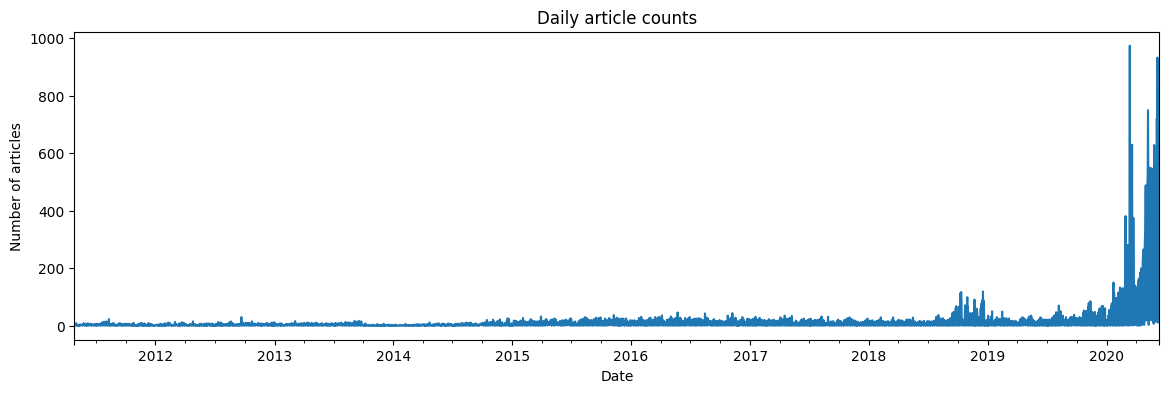

In [6]:
# Purpose: time series of article frequency with null handling
print(f"Rows with valid dates: {df['date'].notna().sum()}/{len(df)}")

# Only proceed if we have valid dates
if df['date'].notna().sum() > 0:
    df_sorted = df.sort_values('date')
    daily_counts = df_sorted.set_index('date').resample('D').size()
    
    plt.figure(figsize=(14,4))
    daily_counts.plot()
    plt.title("Daily article counts")
    plt.xlabel("Date")
    plt.ylabel("Number of articles")
    plt.show()
else:
    print("No valid dates available for time series analysis")

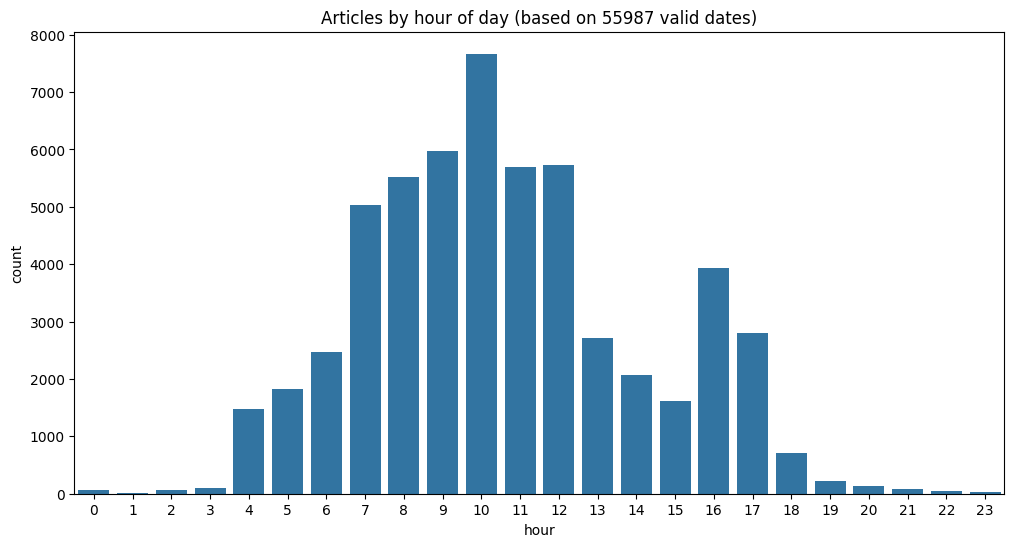

Used 55987 rows with valid dates out of 1407328 total rows


In [7]:
# Purpose: check when during the day most headlines are released
# Only use rows with valid dates
valid_dates = df[df['date'].notna()].copy()

if len(valid_dates) > 0:
    valid_dates['hour'] = valid_dates['date'].dt.hour
    
    plt.figure(figsize=(12,6))
    sns.countplot(x='hour', data=valid_dates)
    plt.title(f"Articles by hour of day (based on {len(valid_dates)} valid dates)")
    plt.show()
    
    print(f"Used {len(valid_dates)} rows with valid dates out of {len(df)} total rows")
else:
    print("No valid dates available for hour analysis")

In [10]:
# Purpose: keyword extraction using pure Python (no scikit-learn required)
import collections
import re
import pandas as pd

def simple_keyword_analysis(headlines_series, top_n=30):
    """Extract top keywords using simple frequency analysis"""
    
    # Combine all headlines
    all_text = ' '.join(headlines_series.fillna('').astype(str).tolist()).lower()
    
    # Extract words (3+ characters)
    words = re.findall(r'\b[a-z]{3,}\b', all_text)
    
    # Extended stop words list
    stop_words = {
        'the', 'and', 'for', 'are', 'with', 'this', 'that', 'from', 'have', 'has',
        'was', 'were', 'will', 'your', 'you', 'they', 'their', 'there', 'what',
        'when', 'where', 'which', 'who', 'why', 'how', 'been', 'into', 'through',
        'during', 'before', 'after', 'above', 'below', 'between', 'among', 'about',
        'also', 'more', 'first', 'last', 'new', 'said', 'says', 'like', 'just',
        'then', 'than', 'out', 'now', 'get', 'got', 'make', 'made', 'making',
        'take', 'took', 'taking', 'see', 'saw', 'seen', 'know', 'known', 'think',
        'thought', 'come', 'came', 'going', 'went', 'gone', 'look', 'looked',
        'looking', 'use', 'used', 'using', 'work', 'worked', 'working', 'want',
        'wanted', 'need', 'needed', 'give', 'gave', 'given', 'tell', 'told',
        'find', 'found', 'become', 'became', 'show', 'showed', 'shown'
    }
    
    # Filter stop words
    filtered_words = [word for word in words if word not in stop_words]
    
    # Count frequency
    word_freq = collections.Counter(filtered_words)
    
    return word_freq.most_common(top_n)

# Run the analysis
print(f"Analyzing {len(df)} headlines...")
top_keywords = simple_keyword_analysis(df['headline'])

print(f"\nTop {len(top_keywords)} keywords by frequency:")
for i, (word, count) in enumerate(top_keywords, 1):
    print(f"{i}. {word} ({count} occurrences)")

# Additional: Bigram analysis (2-word phrases)
def bigram_analysis(headlines_series, top_n=20):
    """Extract top 2-word phrases"""
    all_text = ' '.join(headlines_series.fillna('').astype(str).tolist()).lower()
    words = re.findall(r'\b[a-z]{2,}\b', all_text)
    
    # Create bigrams
    bigrams = [f"{words[i]} {words[i+1]}" for i in range(len(words)-1)]
    
    # Filter bigrams containing stop words
    stop_words = {'the', 'and', 'for', 'are', 'with', 'this', 'that', 'from'}
    filtered_bigrams = [bg for bg in bigrams if not any(sw in bg.split() for sw in stop_words)]
    
    bigram_freq = collections.Counter(filtered_bigrams)
    return bigram_freq.most_common(top_n)

print(f"\nTop 20 bigrams (2-word phrases):")
top_bigrams = bigram_analysis(df['headline'])
for i, (bigram, count) in enumerate(top_bigrams, 1):
    print(f"{i}. {bigram} ({count} occurrences)")

Analyzing 1407328 headlines...

Top 30 keywords by frequency:
1. stocks (161776 occurrences)
2. est (140604 occurrences)
3. eps (128897 occurrences)
4. market (120558 occurrences)
5. shares (114313 occurrences)
6. reports (108710 occurrences)
7. update (91723 occurrences)
8. earnings (87399 occurrences)
9. sales (79645 occurrences)
10. top (79632 occurrences)
11. benzinga (74516 occurrences)
12. week (69572 occurrences)
13. announces (66591 occurrences)
14. price (64407 occurrences)
15. buy (64371 occurrences)
16. mid (62263 occurrences)
17. downgrades (61959 occurrences)
18. trading (61182 occurrences)
19. raises (57802 occurrences)
20. upgrades (56811 occurrences)
21. target (54714 occurrences)
22. maintains (52961 occurrences)
23. down (50060 occurrences)
24. higher (48286 occurrences)
25. day (46141 occurrences)
26. session (45349 occurrences)
27. inc (45179 occurrences)
28. moving (42289 occurrences)
29. stock (39760 occurrences)
30. sees (37979 occurrences)

Top 20 bigrams (2-wor

In [ ]:
# Purpose: simple topic analysis without gensim
import collections
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

print("Performing simple topic analysis using word clustering...")

def simple_topic_analysis(headlines_series, num_topics=5, top_words=6):
    """Simple topic analysis using word frequency clustering"""
    
    # Clean headlines
    clean_headlines = headlines_series.fillna('').astype(str)
    
    # Use CountVectorizer to get word frequencies
    try:
        vectorizer = CountVectorizer(stop_words='english', max_features=100, min_df=2)
        X = vectorizer.fit_transform(clean_headlines)
        feature_names = vectorizer.get_feature_names_out()
        
        # Simple clustering: group by most frequent words
        word_freq = np.array(X.sum(axis=0)).flatten()
        top_indices = word_freq.argsort()[-num_topics*top_words:][::-1]
        
        print("Top words that could represent topics:")
        topic_words = []
        for i in range(num_topics):
            start_idx = i * top_words
            end_idx = start_idx + top_words
            words = [feature_names[idx] for idx in top_indices[start_idx:end_idx]]
            topic_words.append(words)
            print(f"Topic {i}: {', '.join(words)}")
            
        return topic_words
        
    except Exception as e:
        print(f"Simple topic analysis failed: {e}")
        return None

# Run simple topic analysis
if len(df) >= 10:
    topics = simple_topic_analysis(df['headline'])
else:
    print(f"Insufficient data for topic analysis. Need at least 10 documents, have {len(df)}")

Gensim not found. Installing...
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
    --------------------------------------- 0.5/24.4 MB 2.3 MB/s eta 0:00:11
   - -------------------------------------- 0.8/24.4 MB 1.6 MB/s eta 0:00:15
   - -------------------------------------- 1.0/24.4 MB 1.5 MB/s eta 0:00:16
   -- ------------------------------------- 1.3/24.4 MB 1.5 MB/s eta 0:00:16
   -- ------------------------------------- 1.6/24.4 MB 1.4 MB/s eta 0:00:16
   --- ------------------------------------ 1.8/24.4 MB 1.4 MB/s eta 0:00:16
   --- ------------------------------------ 2.1/24.4 MB 1.4 MB/s eta 0:00:17
   --- ------------------------------------ 2.4/24.4 MB 1.4 MB/s eta 0:00:16
   ---- ----------------------------------- 2.9/24.4 MB 1.4 MB/s


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Gensim installed successfully!
Preparing data for LDA topic modeling...
Documents available for LDA: 1407317/1407328
Dictionary size: 66807
Corpus size: 1407317


In [ ]:
# Purpose: extract domain when publisher column contains email addresses
print("Analyzing publisher domains...")

# Check if publisher column might contain emails
def extract_domain(publisher):
    if pd.isna(publisher):
        return 'Unknown'
    
    publisher_str = str(publisher).strip()
    
    # Method 1: Direct email pattern matching
    email_pattern = r'[a-zA-Z0-9._%+-]+@([a-zA-Z0-9.-]+\.[a-zA-Z]{2,})'
    email_match = re.search(email_pattern, publisher_str)
    if email_match:
        return email_match.group(1)
    
    # Method 2: URL pattern matching
    url_pattern = r'(https?://)?(www\.)?([a-zA-Z0-9.-]+\.[a-zA-Z]{2,})'
    url_match = re.search(url_pattern, publisher_str)
    if url_match:
        return url_match.group(3)
    
    # Method 3: If it looks like a clean domain name
    domain_pattern = r'^[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    if re.match(domain_pattern, publisher_str):
        return publisher_str
    
    return 'Other/Name'

# Extract domains
df['domain'] = df['publisher'].apply(extract_domain)

# Analyze results
domain_counts = df['domain'].value_counts()

print("Domain extraction results:")
print(f"Total unique domains/patterns found: {len(domain_counts)}")
print(f"\nTop domains:")
print(domain_counts.head(20))

# Check what percentage are actual domains vs names
domain_like = df['domain'].str.contains(r'\.[a-z]{2,}$', na=False).sum()
print(f"\nStats:")
print(f"Domain-like patterns: {domain_like}/{len(df)} ({domain_like/len(df)*100:.1f}%)")
print(f"Other/Name patterns: {len(df) - domain_like}/{len(df)} ({(len(df)-domain_like)/len(df)*100:.1f}%)")

# Plot if we have meaningful domain data
if domain_like > 0:
    domain_counts[domain_counts.index != 'Other/Name'].head(15).plot(
        kind='bar', 
        figsize=(12, 6),
        title="Top 15 Domains in Publisher Column"
    )
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No email domains found in publisher column - mostly names or other formats")